In [47]:
# Import Libraries

import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
sns.set()

# Load Dataset

dataset = pd.read_csv('sensor_data.csv', usecols=['datetime', 'temperature', 'co2', 'light', 'noise'])



In [48]:
df = pd.read_csv('sensor_data.csv', index_col='datetime', parse_dates=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 9 columns):
location                          37989 non-null object
loc_CO2                           37989 non-null object
temperature                       37989 non-null float64
humidity                          37989 non-null float64
co2                               37989 non-null float64
light                             37989 non-null float64
noise                             37989 non-null float64
bluetooth_devices                 37989 non-null int64
bluetooth_non_personal_devices    29900 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.9+ MB


In [50]:
# Drop location columns
df.drop(df.columns[[0,1]], axis=1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 7 columns):
temperature                       37989 non-null float64
humidity                          37989 non-null float64
co2                               37989 non-null float64
light                             37989 non-null float64
noise                             37989 non-null float64
bluetooth_devices                 37989 non-null int64
bluetooth_non_personal_devices    29900 non-null float64
dtypes: float64(6), int64(1)
memory usage: 2.3 MB


In [52]:
df.drop(df.columns[[-1, -2]], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 5 columns):
temperature    37989 non-null float64
humidity       37989 non-null float64
co2            37989 non-null float64
light          37989 non-null float64
noise          37989 non-null float64
dtypes: float64(5)
memory usage: 1.7 MB


In [53]:
df.drop(df.columns[[1]], axis=1, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 4 columns):
temperature    37989 non-null float64
co2            37989 non-null float64
light          37989 non-null float64
noise          37989 non-null float64
dtypes: float64(4)
memory usage: 1.4 MB


In [55]:
# Shape

print(dataset.shape)

(37989, 5)


In [56]:
# Head

dataset.head(20)

,datetime,temperature,co2,light,noise
0,2017-03-25 09:05:58,22.6,781.0,430.0,511.0
1,2017-03-25 09:06:04,23.8,767.0,448.0,510.0
2,2017-03-25 09:06:10,23.8,754.0,423.0,511.0
3,2017-03-25 09:06:15,23.8,768.0,412.0,492.0
4,2017-03-25 09:06:21,23.8,758.0,428.0,491.0
5,2017-03-25 09:06:27,23.8,776.0,419.0,500.0
6,2017-03-25 09:06:33,23.8,755.0,423.0,503.0
7,2017-03-25 09:06:38,23.8,755.0,409.0,501.0
8,2017-03-25 09:06:44,23.8,766.0,447.0,506.0
9,2017-03-25 09:06:50,23.8,771.0,423.0,515.0


In [57]:
# Descriptions

print(dataset.describe())

        temperature           co2         light         noise
count  37989.000000  37989.000000  3.798900e+04  37989.000000
mean      23.024386   1192.690779  3.057904e+03    315.193977
std        7.552849    162.518301  1.520886e+05    177.548181
min     -999.000000      2.000000  0.000000e+00      0.000000
25%       22.300000   1083.000000  1.810000e+02    144.000000
50%       22.900000   1230.000000  2.210000e+02    216.000000
75%       23.200000   1301.000000  4.530000e+02    502.000000
max       29.400000   2001.000000  1.000000e+07   1023.000000


In [58]:
# Eliminate Outliers

dataset = dataset [dataset.temperature > 0]
dataset = dataset [dataset.light > 0]
dataset = dataset [dataset.noise > 0]
dataset = dataset [dataset.co2 != 2]
print(dataset.describe())

        temperature           co2         light         noise
count  37948.000000  37948.000000  3.794800e+04  37948.000000
mean      23.078610   1193.612944  3.060948e+03    315.225677
std        1.431952    159.206317  1.521707e+05    177.527693
min       21.000000    629.000000  1.000000e+00     33.000000
25%       22.300000   1083.000000  1.810000e+02    144.000000
50%       22.900000   1230.000000  2.210000e+02    216.000000
75%       23.200000   1301.000000  4.530000e+02    502.000000
max       29.400000   2001.000000  1.000000e+07   1023.000000


In [59]:
# Create copy of temperature data

temp_data = df[['temperature']].copy()

In [60]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37989 entries, 2017-03-25 09:05:58 to 2017-05-13 16:13:20
Data columns (total 1 columns):
temperature    37989 non-null float64
dtypes: float64(1)
memory usage: 593.6 KB


In [61]:
# Delete the 2 -999 error values
temp_data = temp_data[temp_data['temperature'] != -999]

In [62]:
# Convert dataframe to PeriodIndex of temperature data

temp_period = temp_data.to_period(freq='D')
temp_period.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 37987 entries, 2017-03-25 to 2017-05-13
Freq: D
Data columns (total 1 columns):
temperature    37987 non-null float64
dtypes: float64(1)
memory usage: 593.5 KB


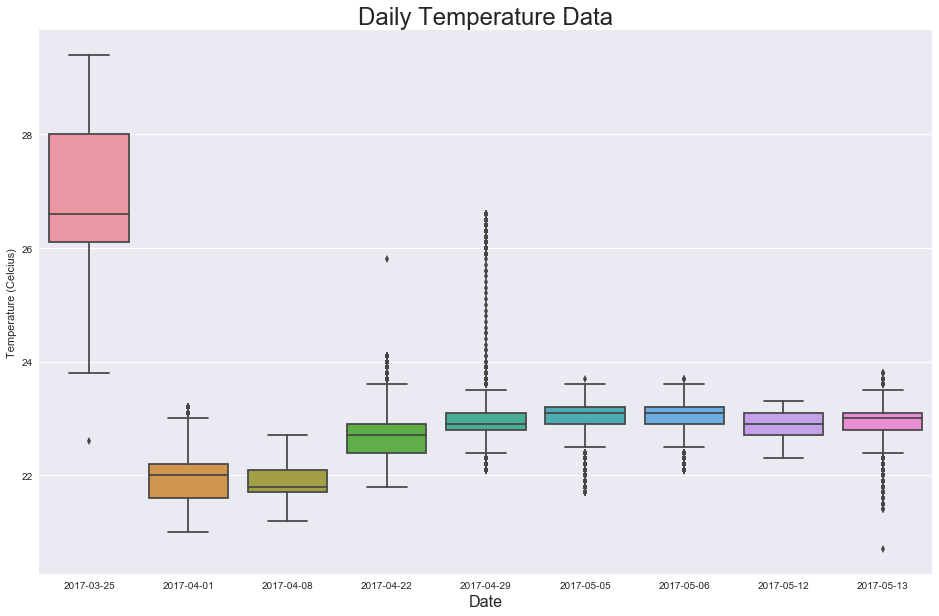

In [63]:
# Box-and-whisker plots for daily temperature

fig, ax = plt.subplots(figsize=(16,10))

sns.boxplot(x=temp_period.index, y='temperature', data=temp_period, ax=ax)
ax.set_title('Daily Temperature Data', fontsize=24)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Temperature (Celcius)')
plt.show()

In [64]:
# Normalize time series data

from sklearn.preprocessing import MinMaxScaler

# load the dataset and print the first 5 rows

series = temp_period
print(series.head())

# prepare data for normalization

values = series.values
values = values.reshape((len(values), 1))

# train the normalization

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print the first 5 rows

normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])
    
# inverse transform and print the first 5 rows

inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

            temperature
datetime               
2017-03-25         22.6
2017-03-25         23.8
2017-03-25         23.8
2017-03-25         23.8
2017-03-25         23.8
Min: 20.700000, Max: 29.400000
[ 0.2183908]
[ 0.35632184]
[ 0.35632184]
[ 0.35632184]
[ 0.35632184]
[ 22.6]
[ 23.8]
[ 23.8]
[ 23.8]
[ 23.8]


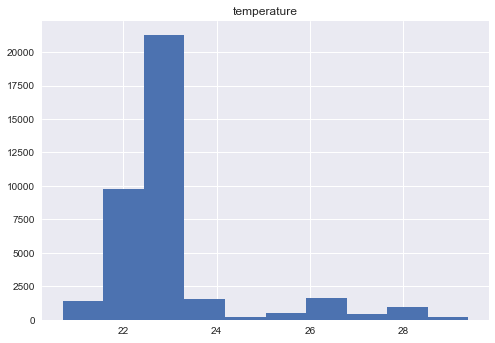

In [65]:
# Plotting the results

series.hist()
plt.show()

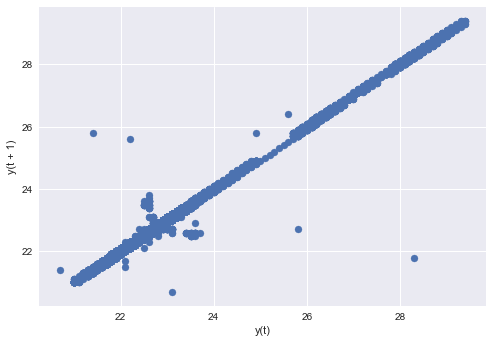

In [66]:
# Lag Plot

from pandas.tools.plotting import lag_plot
lag_plot(series)
plt.show()

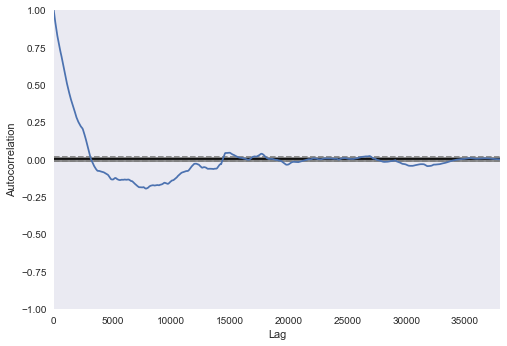

In [67]:
# Autocorrelation plot

from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

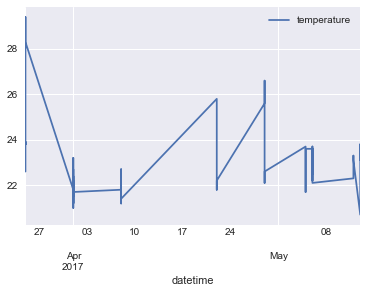

In [68]:
%matplotlib inline
series.plot()

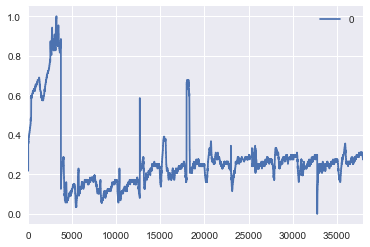

In [69]:
norma = pd.DataFrame(normalized)
norma.plot()

In [70]:
# Linear Regression Before Normalization

from sklearn.linear_model import LinearRegression
estimator = LinearRegression()

sen = pd.read_csv('dataset2.csv')
sen.datetime = pd.to_datetime(sen.datetime)
#sen.set_index('datetime')

sen = sen[['datetime', 'temperature', 'count_total']]

X = sen[['temperature']]
Y = sen['count_total']
model = estimator.fit(X, Y)

# Put a random number to try the model

print(model.predict([[24]]))

[ 24.67034856]


In [71]:
# K-Nearest Neighbour Regression Before Normalization

from sklearn.neighbors import KNeighborsRegressor
estimator = KNeighborsRegressor()

sen = sen[['datetime', 'temperature', 'count_total']]

X = sen[['temperature']]
Y = sen['count_total']
model=estimator.fit(X, Y)

# Put a random number to try the model

print(model.predict([[24]]))

[ 16.6]


In [72]:
# Random Forest Regression Before Normalization

from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()

sen = sen[['datetime', 'temperature', 'count_total']]

X = sen[['temperature']]
Y = sen['count_total']
model = estimator.fit(X, Y) 

# Put a random number to try the model

print(model.predict([[24]]))

[ 13.68763602]


In [73]:
# Linear Regression Classification

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X = sen[['temperature']]
y = sen['count_total']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print(classification_report(expected, predicted))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       396
        1.0       0.00      0.00      0.00         1
        2.0       0.00      0.00      0.00         2
        3.0       0.00      0.00      0.00         2
        4.0       0.00      0.00      0.00        19
        5.0       0.00      0.00      0.00         2
        6.0       0.00      0.00      0.00         5
        7.0       0.00      0.00      0.00         6
        8.0       0.00      0.00      0.00        11
        9.0       0.00      0.00      0.00        27
       10.0       0.00      0.00      0.00         5
       11.0       0.00      0.00      0.00        12
       12.0       0.00      0.00      0.00        24
       13.0       0.00      0.00      0.00        20
       14.0       0.00      0.00      0.00        49
       15.0       0.00      0.00      0.00        30
       16.0       0.00      0.00      0.00        35
       17.0       0.00      0.00      0.00   

/Users/svetlanazolotareva/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
# K-Nearest Neighbour Classification

from sklearn.neighbors import KNeighborsClassifier

X = sen[['temperature']]
y = sen['count_total']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2)

model = KNeighborsClassifier(20)
model.fit(X_train, y_train)

expected = model.predict(X_test)

print(classification_report(expected, predicted))


             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       272
       14.0       0.00      0.00      0.00        45
       24.0       0.00      0.00      0.00        17
       27.0       0.00      0.00      0.00        54
       28.0       0.00      0.00      0.00       276
       29.0       0.00      0.00      0.00       715
       30.0       0.00      0.00      0.00       365
       31.0       0.51      1.00      0.68      1849

avg / total       0.26      0.51      0.35      3593



/Users/svetlanazolotareva/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

X = sen[['temperature']]
y = sen['count_total']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

expested = y_test
predicted = model.predict(X_test)

print(classification_report(expected, predicted))

             precision    recall  f1-score   support

        0.0       0.10      0.08      0.09       272
        4.0       0.00      0.00      0.00         0
       14.0       0.00      0.00      0.00        45
       24.0       0.00      0.00      0.00        17
       27.0       0.00      0.00      0.00        54
       28.0       0.00      0.00      0.00       276
       29.0       0.22      0.24      0.23       715
       30.0       0.11      0.12      0.11       365
       31.0       0.51      0.61      0.55      1849

avg / total       0.32      0.38      0.35      3593



/Users/svetlanazolotareva/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/svetlanazolotareva/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
